# What makes a Youtube Video End Up on the Trending Page?

By: Daniel Kim, Katherine Sebina, and Mufaro Shumba



# Introduction

**Background**

YouTube is the world’s largest and most famous video-sharing platform. It serves millions of concurrent users everyday and has vast influence on customer behavior, beliefs and opinions. YouTube is a free to use service and can be a great space for people to discover things they like. For many people, YouTube is used to watch music videos, comedy shows, how to guides, recipes, hacks and more. Maximizing video performance has gained tangible economic value *and* many startups use it to gain traction and garner interest in their products and services. YouTube maintains a list of the top trending videos on the platform. YouTube uses a combination of factors determine top-trending videos. 

In this study, we aim to create a model to predict what indicates if a YouTube video will go trending. We will explore a dataset that shows trending YouTube videos and combine it with another dataset that contains all YouTube videos. After comparing the data, we will formulate a hypothesis to determine a video's overall performance through a series of metrics such as views counts, like/dislike ratio and number of days trending. We will then test our tool on the current trending list to see how accurate our hypothesis was correct.



# Getting Started


These are the required imported libraries we used:
*   **Pandas:** used for data display and partitioning
*   **IO:** facilities for dealing with various types of I/O.
*   **Seaborn:** provides a high-level interface for graphics on top of Matplotlib
*   **Matplotlib - pyplot:** used for plotting Pandas data into graphs and charts
*   **Numpy:** 
*   **Operator:**


In [0]:
import pandas as pd
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import operator
import spacy.cli
import datetime
from scipy import stats

# Preprocessing Data

Load .csv file and display the first 5 rows to get a sense of what is contained in the dataset. Although this source contains data for a wide variety of countries, we decided to focus on the United States.

In [0]:
uploaded = files.upload()
spacy.cli.download("en_core_web_sm")

data = pd.read_csv(io.BytesIO(uploaded['USvideos.csv']))

data.head()

Saving USvideos.csv to USvideos.csv
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,1ZAPwfrtAFY,17.13.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",993345,65551,3544,8128,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
1,5qpjK5DgCt4,17.13.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",2568721,132724,4495,7494,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
2,puqaWrEC7tY,17.13.11,Nickleback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",118585,6183,361,1374,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
3,d380meD0W0M,17.13.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",1867990,123933,1836,16635,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,nc99ccSXST0,17.13.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",669608,21357,591,3050,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....


The category id currently contains 44 unique ids to indicate what genre or category the video falls under. These ids are numbers which cannot be easily interpreted therefore we decided to tidy our data by changing the category_id to a representable label.

In [0]:
data['category_id'] = data['category_id'].astype('str')

for rows in data.iterrows():
  cat_id = rows[1]['category_id']

  if cat_id == "1":
    data.at[rows[0],'category_id'] = "Film & Animation"
  elif cat_id == "2":
    data.at[rows[0],'category_id'] = "Autos & Vehicles"
  elif cat_id == "10":
    data.at[rows[0],'category_id'] = "Music"
  elif cat_id == "15":
    data.at[rows[0],'category_id'] = "Pets & Animals"
  elif cat_id == "17":
    data.at[rows[0],'category_id'] = "Sports"
  elif cat_id == "18":
    data.at[rows[0],'category_id'] = "Short Movies"
  elif cat_id == "19":
    data.at[rows[0],'category_id'] = "Travel & Events"
  elif cat_id == "20":
    data.at[rows[0],'category_id'] = "Gaming"
  elif cat_id == "21":
    data.at[rows[0],'category_id'] = "Videoblogging"
  elif cat_id == "22":
    data.at[rows[0],'category_id'] = "People & Blogs"
  elif cat_id == "23":
    data.at[rows[0],'category_id'] = "Comedy"
  elif cat_id == "24":
    data.at[rows[0],'category_id'] = "Entertainment"
  elif cat_id == "25":
    data.at[rows[0],'category_id'] = "News & Politics"
  elif cat_id == "26":
    data.at[rows[0],'category_id'] = "Howto & Style"
  elif cat_id == "27":
    data.at[rows[0],'category_id'] = "Education"
  elif cat_id == "28":
    data.at[rows[0],'category_id'] = "Science & Technology"
  elif cat_id == "29":
    data.at[rows[0],'category_id'] = "Nonprofits & Activism"
  elif cat_id == "30":
    data.at[rows[0],'category_id'] = "Movies"
  elif cat_id == "31":
    data.at[rows[0],'category_id'] = "Anime/Animation"
  elif cat_id == "32":
    data.at[rows[0],'category_id'] = "Action/Adventure"
  elif cat_id == "33":
    data.at[rows[0],'category_id'] = "Classics"
  elif cat_id == "34":
    data.at[rows[0],'category_id'] = "Comedy"
  elif cat_id == "35":
    data.at[rows[0],'category_id'] = "Documentary"
  elif cat_id == "36":
    data.at[rows[0],'category_id'] = "Drama"
  elif cat_id == "37":
    data.at[rows[0],'category_id'] = "Family"
  elif cat_id == "38":
    data.at[rows[0],'category_id'] = "Foreign"
  elif cat_id == "39":
    data.at[rows[0],'category_id'] = "Horror"
  elif cat_id == "40":
    data.at[rows[0],'category_id'] = "Sci-Fi/Fantasy"
  elif cat_id == "41":
    data.at[rows[0],'category_id'] = "Thriller"
  elif cat_id == "42":
    data.at[rows[0],'category_id'] = "Shorts"
  elif cat_id == "43":
    data.at[rows[0],'category_id'] = "Shows"
  elif cat_id == "44":
    data.at[rows[0],'category_id'] = "Trailers"
  
data.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,1ZAPwfrtAFY,17.13.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",993345,65551,3544,8128,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
1,5qpjK5DgCt4,17.13.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",2568721,132724,4495,7494,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
2,puqaWrEC7tY,17.13.11,Nickleback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",118585,6183,361,1374,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
3,d380meD0W0M,17.13.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",1867990,123933,1836,16635,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,nc99ccSXST0,17.13.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,Science & Technology,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",669608,21357,591,3050,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....


This graph displays the amount of trending videos in the most popular categories.

Text(0.5, 1.0, 'Catogories of trend videos in US')

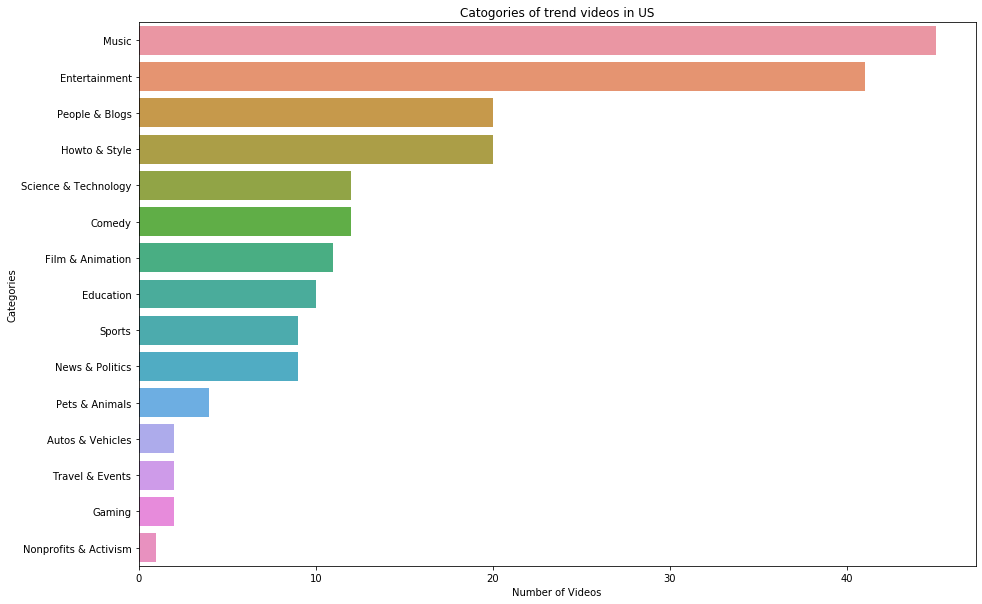

In [0]:

categories_videos_df = data['category_id'].value_counts().reset_index()
plt.figure(figsize=(15,10))
ax = sns.barplot(x=categories_videos_df['category_id'],y=categories_videos_df['index'], data=categories_videos_df,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in US")

These bar graphs below will represent the relationship between time and date published and whether or not the video will begin trending. The publish_time is column is represented in a datetime objected therefore we must strip and seperate the day and time into two different columns.We added two columns to represent the date and hour of publishing each video, then delete the original publish_time column because we will not need it anymore.

In [0]:
data["publishing_day"] = data["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
data["publishing_hour"] = data["publish_time"].apply(lambda x: x[11:13])
data.drop(labels='publish_time', axis=1, inplace=True)

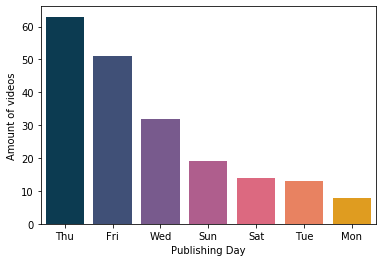

In [0]:
publishing_day_df = data["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "Amount_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="Amount_of_videos", data=publishing_day_df, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="Amount of videos")


We can see that the number of trending videos published on Thursday and Friday are noticeably more than the number of trending videos published on other days of the week.

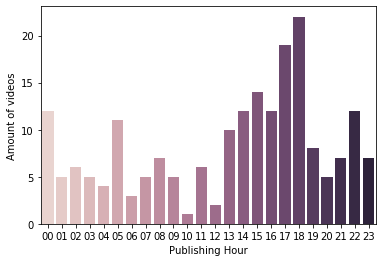

In [0]:
publishing_hour_df = data["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "Amount_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="Amount_of_videos", data=publishing_hour_df, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="Amount of videos")

We can see that the period between 3PM and 6PM, peaking between 5PM and 6PM, had the largest number of trending videos. We notice also that the period between 10AM and 12AM has the smallest number of trending videos.

In [0]:
# Determine the amount of times the same video occurs in this table
# 'count' represents the amount of times a singular video has been trending from 01/17/12

video_ids = data['video_id']
keys = video_ids.drop_duplicates()

vid_occ = dict.fromkeys(keys, 0)

for vid in keys:
  count = 0
  for other_vid in video_ids:
    if vid == other_vid:
      count += 1
  vid_occ[vid] = count


In [0]:
# Looking at the videos that were trending more than 2 times, these videos are stored in the rows_info dictionary
# -- The key is the videoID and the value are the rows that have that videoID
# The data includes video with a video_id of #NAME?, this data is not included (considered bad data)

indeces = []
values = []
for idx, val in vid_occ.items():
  if val >= 1 and idx != "#NAME?":
    indeces.append(idx)
    values.append(val)

rows_info = dict.fromkeys(indeces, 0)

video_df = data.set_index('video_id')

for idx in indeces:
  rows_info[idx] = video_df.loc[idx]


In [0]:
# Each bucket corresponds to the data for a particular trending video
# These are the videos in the rows_info dictionary
# These buckets are going to be used in the analysis portion
num_trend = []
views = []
likes = []
dislikes = []
comment_count = []
category_id = []
channel_title = []
vid_title = []
pub_date = []
trend_date = []
indeces = []

for idx, rows in rows_info.items():
  curr = rows.iloc[(rows.shape)[0] - 1] 
  if type(curr) == pd.Series:
    indeces.append(idx)
    num_trend.append(rows.shape[0])
    views.append(curr['views'])
    likes.append(curr['likes'])
    dislikes.append(curr['dislikes'])
    comment_count.append(curr['comment_count'])
    category_id.append(curr['category_id'])
    channel_title.append(curr['channel_title'])
    vid_title.append(curr['title'])
    pub_date.append(curr['publish_time'])
    trend_date.append(curr['trending_date'])



In [0]:
attr_df = pd.DataFrame(list(zip(num_trend, views, likes, dislikes, comment_count, category_id, channel_title, vid_title, pub_date, trend_date)), 
                       index = indeces, 
                       columns = ['trending_occ', 
                                  'views', 'likes', 'dislikes', 
                                  'comment_count', 'category_id',
                                  'channel_title', 'title',
                                  'publish_time', 'trending_date'])

attr_df = attr_df[attr_df.likes != 0]
attr_df = attr_df[attr_df.dislikes != 0]
attr_df = attr_df[attr_df.comment_count != 0]

attr_df.head()
    

,trending_occ,views,likes,dislikes,comment_count,category_id,channel_title,title,publish_time,trending_date
6ZfuNTqbHE8,9,37736281,1735895,21969,241237,Entertainment,Marvel Entertainment,Marvel Studios' Avengers: Infinity War Officia...,2017-11-29T13:26:24.000Z,17.30.11
XbuQAbG2AZ0,5,868868,21005,988,2543,News & Politics,The New York Times,"Jay-Z and Dean Baquet, in Conversation",2017-11-30T14:30:00.000Z,17.05.12
evhLzq7Gsak,2,971123,6325,2512,5824,News & Politics,TODAY,Matt Lauer Has Been Fired From NBC News | TODAY,2017-11-29T14:42:32.000Z,17.30.11
KXHrCBkIxQQ,8,197900,2394,372,432,Entertainment,Sony Pictures Entertainment,ALL THE MONEY IN THE WORLD - Official Trailer ...,2017-11-29T20:00:53.000Z,17.30.11
TsT5GLWgSkU,5,1008131,83790,2884,5274,Comedy,jacksfilms,Reacting to Avengers: Infinity War trailer,2017-11-29T23:25:44.000Z,17.05.12


Text(0, 0.5, 'Views')

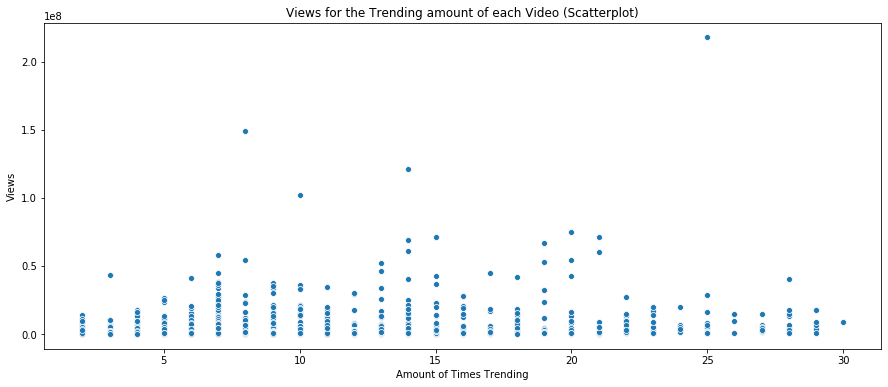

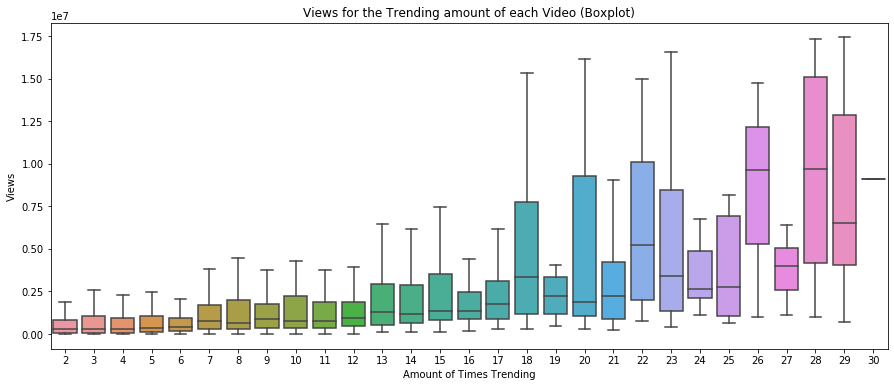

In [0]:
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x = 'trending_occ', y = 'views', data = attr_df)
plt.title('Views for the Trending amount of each Video (Scatterplot)')
plt.xlabel('Amount of Times Trending')
plt.ylabel('Views')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'views', data = attr_df, showfliers=False)
plt.title('Views for the Trending amount of each Video (Boxplot)')
plt.xlabel('Amount of Times Trending')
plt.ylabel('Views')

Text(0, 0.5, 'Likes')

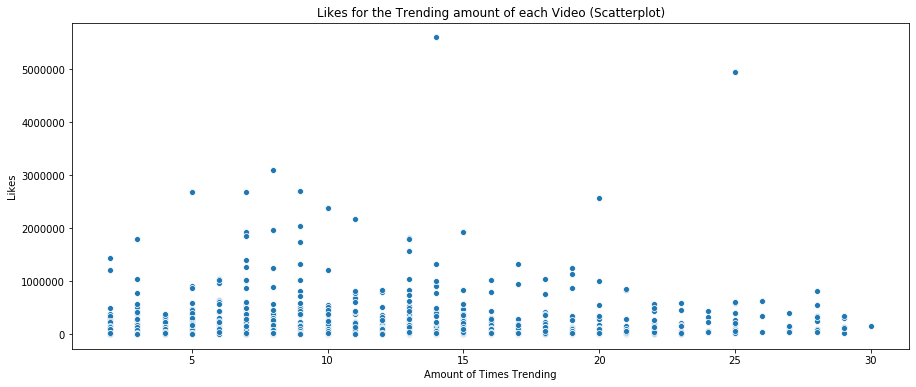

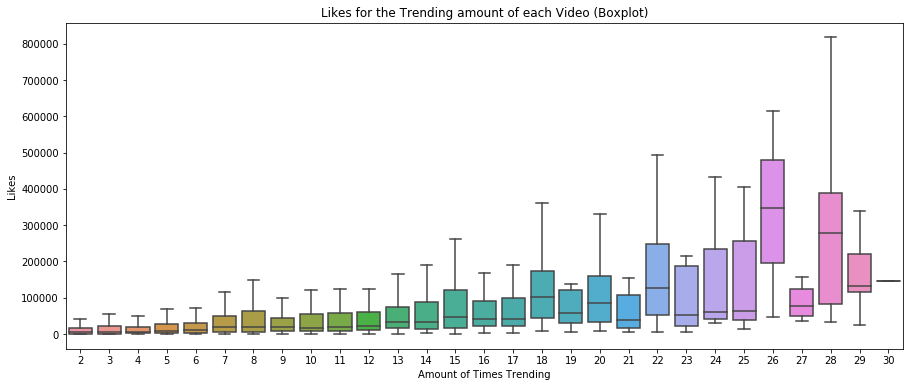

In [0]:
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x = 'trending_occ', y = 'likes', data = attr_df)
plt.title('Likes for the Trending amount of each Video (Scatterplot)')
plt.xlabel('Amount of Times Trending')
plt.ylabel('Likes')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'likes', data = attr_df, showfliers=False)
plt.title('Likes for the Trending amount of each Video (Boxplot)')
plt.xlabel('Amount of Times Trending')
plt.ylabel('Likes')

Text(0, 0.5, 'Dislikes')

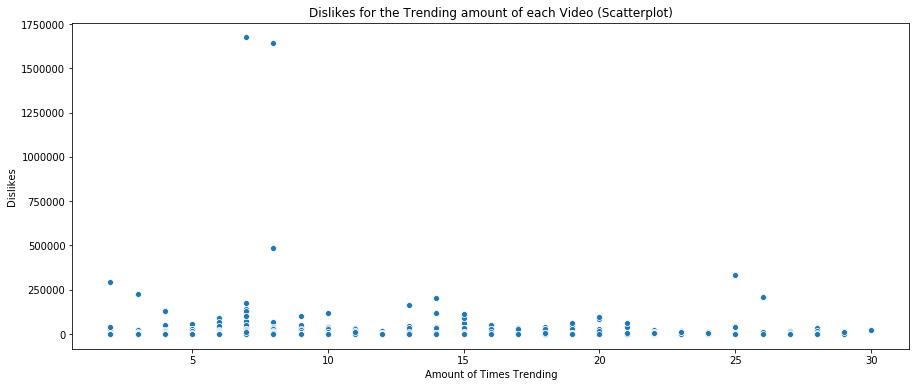

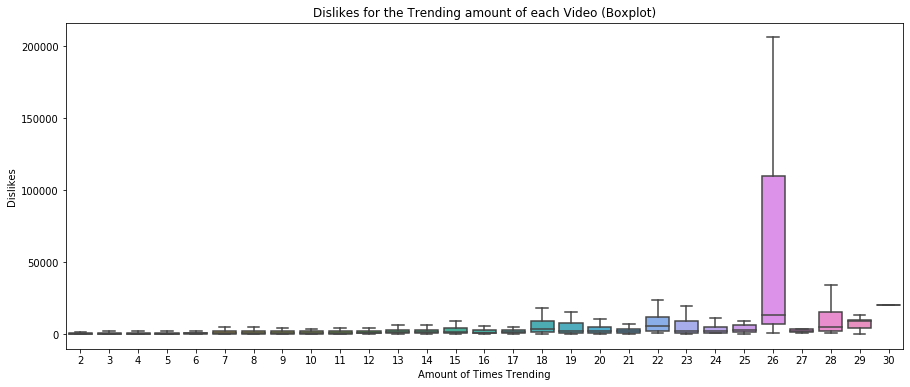

In [0]:
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x = 'trending_occ', y = 'dislikes', data = attr_df)
plt.title('Dislikes for the Trending amount of each Video (Scatterplot)')
plt.xlabel('Amount of Times Trending')
plt.ylabel('Dislikes')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'dislikes', data = attr_df, showfliers=False)
plt.title('Dislikes for the Trending amount of each Video (Boxplot)')
plt.xlabel('Amount of Times Trending')
plt.ylabel('Dislikes')

Text(0, 0.5, 'Comment Count')

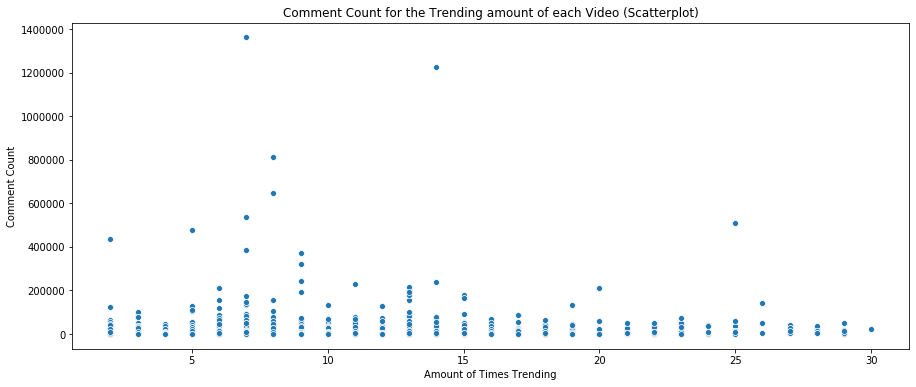

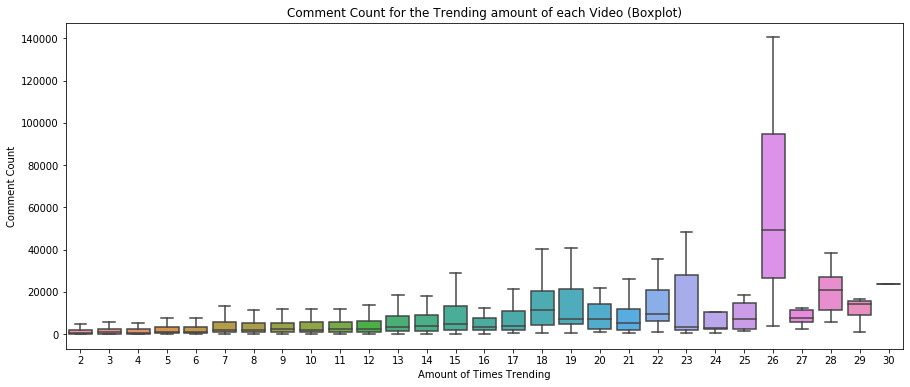

In [0]:
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x = 'trending_occ', y = 'comment_count', data = attr_df)
plt.title('Comment Count for the Trending amount of each Video (Scatterplot)')
plt.xlabel('Amount of Times Trending')
plt.ylabel('Comment Count')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'comment_count', data = attr_df, showfliers=False)
plt.title('Comment Count for the Trending amount of each Video (Boxplot)')
plt.xlabel('Amount of Times Trending')
plt.ylabel('Comment Count')

In [0]:
comment_count = attr_df[['comment_count']].copy()
comment_count = comment_count.sort_values(by = ['comment_count'])
comment_count = comment_count[(np.abs(stats.zscore(comment_count)) < 3).all(axis=1)]
trending = []

attr_df.loc['6ZfuNTqbHE8','comment_count']
# for row_a in comment_count.iterrows():
#   print(row_a[0])
#   trending.append(attr_df.iloc[row_a[0]])

# comment_count['trending_occ'] = trending
# comment_count.head()

# plt.figure(figsize=(15, 6))
# ax = sns.scatterplot(x = 'trending_occ', y = 'comment_count', data = comment_count_df)
# plt.figure(figsize=(15, 6))

# ax = sns.boxplot(x = 'trending_occ', y = 'comment_count', data = comment_count_df)

In [0]:
dislikes_df = attr_df

for rows in dislikes_df.iterrows():
  if rows[1]['dislikes'] > 200000:
    dislikes_df = dislikes_df.drop([rows[0]])

plt.figure(figsize=(20, 10))
ax = sns.boxplot(x = 'trending_occ', y = 'dislikes', data = dislikes_df, showfliers=False)

In [0]:
#import nltk
# nltk.download('twitter_samples') instead use data['title'] and data['description]

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True